In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pathlib
import os
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix, classification_report

### Processing

In [226]:
#path
# (r'E:\Rostock-Masters\Thesis\Test') # 100 files
# (r'C:\Users\NAZMUL-LAPTOP\Python\Thesis\read_files\msmts-smartlab-2020-10-27') #500files

In [227]:
data_dir_3 = (r'D:\Rostock-Masters\Thesis\Test') #
data_dir_3 = pathlib.Path(data_dir_3)
data_dir_3

WindowsPath('D:/Rostock-Masters/Thesis/Test')

In [228]:
file_name_dict_3 = {
    'Device_1' : list(data_dir_3.glob('Device_1/*.csv')),
    'Device_2' : list(data_dir_3.glob('Device_2/*.csv')),
    'Device_3' : list(data_dir_3.glob('Device_3/*.csv')),
    'Device_4' : list(data_dir_3.glob('Device_4/*.csv')),
    'Device_5' : list(data_dir_3.glob('Device_5/*.csv')),
    'Device_6' : list(data_dir_3.glob('Device_6/*.csv')),
    'Device_7' : list(data_dir_3.glob('Device_7/*.csv'))
}

In [229]:
len(file_name_dict_3['Device_1'])

100

In [230]:
file_name_dict_3['Device_2'][98]

WindowsPath('D:/Rostock-Masters/Thesis/Test/device_2/3_8_2_3_8_2-98.csv')

In [231]:
str(file_name_dict_3['Device_1'][48])

'D:\\Rostock-Masters\\Thesis\\Test\\device_1\\3_8_1_3_8_1-52.csv'

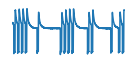

In [232]:
df_device_1 = pd.read_csv(str(file_name_dict_3['Device_1'][99]))
df_device_1.columns = ['time', 'voltage']
# df_short= df_device_1.iloc[:1500, :]

plt.figure(100,figsize=(2,1))
plt.axis('off')
plt.plot(df_device_1['time'], df_device_1['voltage'])
plt.savefig('reduced.png',bbox_inches = 'tight',dpi=100, pad_inches = 0)
plt.tight_layout()
plt.show()

### Function

In [234]:
def csv_plot(device, fold_name, img_name):
    df_shortened_list = []
    for csv_file in file_name_dict_3[device]:
            csv_file_df = pd.read_csv(str(csv_file))
            csv_file_df.columns = ['time', 'voltage']
            df_short = csv_file_df #csv_file_df.iloc[:2000, :]
            df_shortened_list.append(df_short)
            
    #Saving plotted images
    for j in range (len(df_shortened_list)):
        plt.figure(100,figsize=(1,1))
        plt.axis('off')
        plt.plot(df_shortened_list[j]['time'], df_shortened_list[j]['voltage'])
        plt.savefig(r'D:\Rostock-Masters\Thesis\Data\full_images\{}/{}-{}.jpg'.format(fold_name,img_name,j),bbox_inches = 'tight', pad_inches = 0)
        plt.close()

In [235]:
## save image to folder
# csv_plot('Device_1', 'Device_1', 'device_1')
# csv_plot('Device_2', 'Device_2', 'device_2')
# csv_plot('Device_3', 'Device_3', 'device_3')
# csv_plot('Device_4', 'Device_4', 'device_4')
# csv_plot('Device_5', 'Device_5', 'device_5')
# csv_plot('Device_6', 'Device_6', 'device_6')
csv_plot('Device_7', 'Device_7', 'device_7')

-----------------------------------------------------------------------------------------------------------------------------------------

### CNN

In [236]:
data_dir = (r'D:\Rostock-Masters\Thesis\Data\full_images')
data_dir

'D:\\Rostock-Masters\\Thesis\\Data\\full_images'

In [237]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/Rostock-Masters/Thesis/Data/full_images')

In [238]:
image_count_1 = list(data_dir.glob('Device_5/*'))
len(image_count_1)

101

In [239]:
Device_1 = list(data_dir.glob('Device_1/*'))
Device_1[:5]

[WindowsPath('D:/Rostock-Masters/Thesis/Data/full_images/device_1/desktop.ini'),
 WindowsPath('D:/Rostock-Masters/Thesis/Data/full_images/device_1/device_1-0.jpg'),
 WindowsPath('D:/Rostock-Masters/Thesis/Data/full_images/device_1/device_1-1.jpg'),
 WindowsPath('D:/Rostock-Masters/Thesis/Data/full_images/device_1/device_1-10.jpg'),
 WindowsPath('D:/Rostock-Masters/Thesis/Data/full_images/device_1/device_1-11.jpg')]

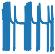

In [240]:
PIL.Image.open(str(Device_1[1]))

In [241]:
device_image_dict = {
    'Device_1' : list(data_dir.glob('Device_1/*.jpg')),
    'Device_2' : list(data_dir.glob('Device_2/*.jpg')),
    'Device_3' : list(data_dir.glob('Device_3/*.jpg')),
    'Device_4' : list(data_dir.glob('Device_4/*.jpg')),
    'Device_5' : list(data_dir.glob('Device_5/*.jpg')),
    'Device_6' : list(data_dir.glob('Device_6/*.jpg')),
    'Device_7' : list(data_dir.glob('Device_7/*.jpg')),
}

In [242]:
device_image_dict['Device_1'][5]

WindowsPath('D:/Rostock-Masters/Thesis/Data/full_images/device_1/device_1-13.jpg')

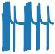

In [243]:
PIL.Image.open(str(device_image_dict['Device_5'][60]))

In [244]:
devices_label_dict = {
    'Device_1' : 0,
    'Device_2' : 1,
    'Device_3' : 2,
    'Device_4' : 3,
    'Device_5' : 4,
    'Device_6' : 5,
    'Device_7' : 6,
    
}

In [245]:
len(device_image_dict['Device_4'])

100

In [246]:
str(device_image_dict['Device_3'][0])

'D:\\Rostock-Masters\\Thesis\\Data\\full_images\\device_3\\device_3-0.jpg'

In [251]:
lst= []
for device_name, images in device_image_dict.items():
    print (device_name, ':',end = ' ')
    print(len(images))
    lst.append(len(images))
print(f'Total numbers of images are: {sum(lst)}')

Device_1 : 100
Device_2 : 100
Device_3 : 100
Device_4 : 100
Device_5 : 100
Device_6 : 100
Device_7 : 61
Total numbers of images are: 661


# Image shape

In [253]:
#Saving image data to a dataframe
device_list, label_list = [],[]

for device_name, folder in device_image_dict.items():
    for image in folder:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(35,35))
        flattened = resized_img.reshape(-1)
        df_flat= pd.DataFrame(flattened.reshape(1,-1))
        device_list.append(df_flat)
        label_list.append(devices_label_dict[device_name])

In [254]:
device_list[300]

,0,1,2,3,4,5,6,7,8,9,...,3665,3666,3667,3668,3669,3670,3671,3672,3673,3674
0,248,251,254,238,245,254,251,252,248,255,...,244,252,249,243,254,254,251,251,252,252


In [255]:
df_merged= pd.concat(device_list)
df_merged= df_merged.reset_index(drop=True)
df_merged

,0,1,2,3,4,5,6,7,8,9,...,3665,3666,3667,3668,3669,3670,3671,3672,3673,3674
0,241,254,255,231,246,254,249,253,248,255,...,231,254,251,236,255,252,245,247,246,244
1,250,249,254,243,248,255,252,254,241,255,...,250,255,254,250,254,253,250,255,254,252
2,241,255,254,250,255,251,255,252,234,255,...,239,253,247,234,253,253,246,251,251,249
3,245,253,251,243,255,254,250,253,241,250,...,232,255,252,239,247,246,238,250,252,251
4,243,248,255,250,246,250,255,254,236,255,...,247,250,250,237,253,253,241,248,249,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,251,247,254,240,243,254,251,251,246,255,...,232,255,255,241,254,251,244,253,254,252
657,244,242,253,235,225,202,228,217,177,238,...,241,255,253,240,255,255,249,246,246,246
658,243,255,249,237,252,254,250,254,249,255,...,236,253,250,236,254,252,244,252,252,250
659,244,250,255,247,241,247,255,253,240,255,...,253,252,247,252,252,249,255,250,249,253


In [256]:
#Merging, Adding label, shuffling
df_with_label= df_merged
df_with_label['label'] = label_list
# df_with_label.to_csv('device_with_label.csv', index=False)
df_1 = df_with_label.sample(frac = 1).reset_index(drop=True)
df_1

,0,1,2,3,4,5,6,7,8,9,...,3666,3667,3668,3669,3670,3671,3672,3673,3674,label
0,242,251,253,233,245,254,247,251,249,255,...,253,250,236,255,253,244,252,249,247,2
1,244,252,253,254,252,243,255,254,237,255,...,255,254,248,253,252,247,252,251,250,0
2,245,252,251,238,251,250,251,254,244,255,...,253,254,252,255,255,254,254,255,254,4
3,246,248,254,242,250,255,248,252,247,255,...,255,253,245,255,255,251,255,254,253,4
4,252,252,252,247,252,255,251,251,241,255,...,254,254,254,255,255,255,255,255,255,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,234,253,240,247,254,252,255,252,249,255,...,253,249,234,253,252,244,246,249,246,0
657,245,248,253,239,247,254,250,252,241,252,...,252,247,249,255,251,244,251,249,241,0
658,246,253,250,254,251,250,248,239,219,248,...,254,253,247,253,254,251,247,250,251,1
659,244,250,255,254,252,255,255,251,233,254,...,255,253,238,255,254,247,255,254,250,2


In [257]:
# b= resized_img.reshape(-1)
# df = pd.DataFrame(b.reshape(1,-1))
# df          

In [258]:
y= np.array(df_1.label)

In [259]:
df_1.drop('label', axis=1,inplace= True)

In [260]:
df_1.shape

(661, 3675)

In [261]:
resized_img.shape

(35, 35, 3)

In [262]:
X = np.array(df_1).reshape(df_1.shape[0],resized_img.shape[0],resized_img.shape[1],resized_img.shape[2])
X.shape

(661, 35, 35, 3)

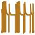

In [263]:
data = PIL.Image.fromarray(X[1])
data

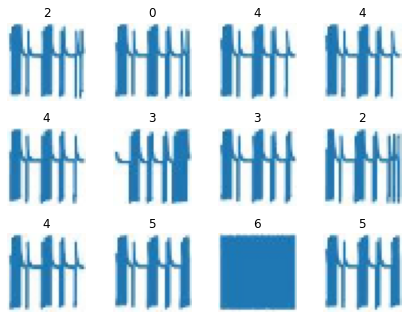

In [292]:
plt.figure(figsize = (6, 6))

for i in range(12):
    plt.subplot(4, 4, i+1).set_title(f'{y[i]}')
    RGB_img = cv2.cvtColor(np.squeeze(X[i]), cv2.COLOR_BGR2RGB)
    plt.imshow (RGB_img)
    plt.axis('off')

plt.tight_layout()
plt.savefig('7_layer_method_subplot.png', dpi=300)

In [265]:
y[599]

2

In [266]:
X.shape

(661, 35, 35, 3)

In [267]:
len(X), len(y)

(661, 661)

In [268]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.10,random_state=42, stratify= y)

In [269]:
X_train.shape

(594, 35, 35, 3)

In [270]:
X_test.shape

(67, 35, 35, 3)

In [271]:
len(X_train)

594

In [272]:
#Print shapes
print('Train tensor shape: ',X_train.shape)
print('Test tensor shape: ',X_test.shape)
print('Single image shape:', X_train[0].shape)
print('Train_labels shape:', y_train.shape)
print('Test_labels shape:', y_test.shape)

Train tensor shape:  (594, 35, 35, 3)
Test tensor shape:  (67, 35, 35, 3)
Single image shape: (35, 35, 3)
Train_labels shape: (594,)
Test_labels shape: (67,)


In [273]:
#scaling data from 0 to 1
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [274]:
X_train_scaled[101].shape

(35, 35, 3)

In [275]:
y_test[10:20]

array([2, 3, 1, 3, 0, 3, 6, 2, 6, 5], dtype=int64)

In [276]:
#Building a model
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([

    tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding="same", activation='relu',kernel_initializer='he_normal',
                           input_shape=(X_train_scaled[0].shape)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    
    tf.keras.layers.Conv2D(16,3, padding="same", activation='relu',kernel_initializer='he_normal',),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(32,3, padding="same",activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64,3, padding="same",activation='relu',kernel_initializer='he_normal', ),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,kernel_initializer='normal',activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256,kernel_initializer='normal',activation='relu'),#kernel_initializer='normal'
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(7, activation= 'softmax') #Output layer
])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 35, 35, 8)         224       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 8)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 17, 17, 16)        1168      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 8, 8, 16)          0         
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 32)         

In [277]:
model_2.compile(loss="sparse_categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

history= model_2.fit(X_train_scaled, y_train, epochs=200, batch_size=64, validation_split=0.20, shuffle = True) #validation_split=0.33
history

Epoch 1/200
8/8 [==============================] - 1s 41ms/step - loss: 2.0150 - accuracy: 0.1389 - val_loss: 1.9301 - val_accuracy: 0.1681
Epoch 2/200
8/8 [==============================] - 0s 22ms/step - loss: 1.9499 - accuracy: 0.1579 - val_loss: 1.9369 - val_accuracy: 0.1849
Epoch 3/200
8/8 [==============================] - 0s 15ms/step - loss: 1.9445 - accuracy: 0.1495 - val_loss: 1.9268 - val_accuracy: 0.1765
Epoch 4/200
8/8 [==============================] - 0s 14ms/step - loss: 1.9393 - accuracy: 0.1579 - val_loss: 1.9223 - val_accuracy: 0.1513
Epoch 5/200
8/8 [==============================] - 0s 14ms/step - loss: 1.9287 - accuracy: 0.1642 - val_loss: 1.9196 - val_accuracy: 0.1008
Epoch 6/200
8/8 [==============================] - 0s 8ms/step - loss: 1.9408 - accuracy: 0.1642 - val_loss: 1.9235 - val_accuracy: 0.1008
Epoch 7/200
8/8 [==============================] - 0s 9ms/step - loss: 1.9249 - accuracy: 0.1789 - val_loss: 1.9235 - val_accuracy: 0.1008
Epoch 8/200
8/8 [=====

8/8 [==============================] - 0s 8ms/step - loss: 0.2040 - accuracy: 0.9326 - val_loss: 0.3213 - val_accuracy: 0.9580
Epoch 118/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2161 - accuracy: 0.9305 - val_loss: 0.3206 - val_accuracy: 0.9496
Epoch 119/200
8/8 [==============================] - 0s 8ms/step - loss: 0.1982 - accuracy: 0.9368 - val_loss: 0.3341 - val_accuracy: 0.9496
Epoch 120/200
8/8 [==============================] - 0s 8ms/step - loss: 0.1958 - accuracy: 0.9432 - val_loss: 0.3305 - val_accuracy: 0.9496
Epoch 121/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2487 - accuracy: 0.9263 - val_loss: 0.3153 - val_accuracy: 0.9496
Epoch 122/200
8/8 [==============================] - 0s 8ms/step - loss: 0.1892 - accuracy: 0.9326 - val_loss: 0.3148 - val_accuracy: 0.9496
Epoch 123/200
8/8 [==============================] - 0s 8ms/step - loss: 0.2004 - accuracy: 0.9389 - val_loss: 0.3152 - val_accuracy: 0.9580
Epoch 124/200
8/8 [========

In [278]:
print('Validation accuracy : ', (np.mean(history.history['val_accuracy'][-50:]))*100, '%') # Mean of last 50 values

Validation accuracy :  95.24369776248932 %


In [279]:
# model_2.save('7_layer_saved_model.h5')

In [280]:
loss, accuracy= model_2.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')
print('Test accuracy : ',accuracy*100,'%')

3/3 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9552
Loss: 0.15598048269748688, Accuracy: 0.9552238583564758
Test accuracy :  95.52238583564758 %


#### Note
1. 30x30 image size gives accuracy of 88-98%
2. 40x40 image size gives accuracy of 98.88%
3. 35x35 image gives accuracy of 96.66 - 98%

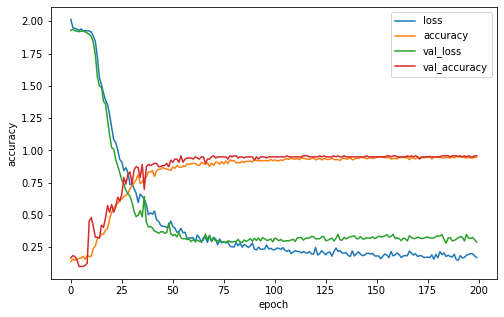

In [281]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.xlabel('epoch')
plt.ylabel('accuracy')
# plt.savefig('full_img_acc_loss.pdf', bbox_inches = 'tight', pad_inches = 0, dpi= 100)
plt.show()

In [282]:
y_pred = model_2.predict(X_test_scaled)
# y_pred[:10]

3/3 [==============================] - 0s 2ms/step


In [283]:
import sys
# np.set_printoptions(threshold=sys.maxsize, suppress=True)
y_pred

array([[9.93388216e-09, 9.02164519e-01, 8.14973777e-09, 1.45244685e-05,
        2.14099682e-10, 1.64587334e-06, 9.78193507e-02],
       [9.99996543e-01, 1.70748740e-06, 1.00503871e-06, 8.59802138e-14,
        1.78647860e-11, 8.16845215e-07, 3.65722030e-08],
       [4.10975503e-07, 2.54846582e-05, 1.39121203e-05, 2.21036917e-05,
        9.95238224e-06, 3.71009818e-08, 9.99928117e-01],
       [2.34308658e-07, 4.76320565e-07, 1.18649751e-12, 1.45060353e-11,
        8.45304549e-10, 9.99998927e-01, 3.58195763e-07],
       [2.74551530e-06, 8.57074916e-01, 2.85625651e-06, 6.35785749e-04,
        2.96148812e-07, 1.69535662e-04, 1.42113835e-01],
       [2.35292916e-07, 1.43309819e-06, 8.68782303e-12, 2.45850229e-10,
        5.83891513e-09, 9.99994636e-01, 3.69778763e-06],
       [8.86888856e-08, 9.08450663e-01, 5.07697138e-08, 6.50102447e-06,
        5.08124820e-10, 6.07985248e-06, 9.15367082e-02],
       [5.58737447e-08, 7.01800618e-09, 1.08817017e-04, 1.81829193e-04,
        9.99390960e-01, 3

In [284]:
y_pred[1]

array([9.9999654e-01, 1.7074874e-06, 1.0050387e-06, 8.5980214e-14,
       1.7864786e-11, 8.1684522e-07, 3.6572203e-08], dtype=float32)

In [285]:
# for i in y_pred:
#     max_value= np.max(i)
#     if max_value <=0.10:
#         print('Anomaly detected')

In [286]:
y_pred_class = [np.argmax(i) for i in y_pred]
y_pred_class[:10]

[1, 0, 6, 5, 1, 5, 1, 4, 0, 0]

In [287]:
y_test[:10]

array([1, 0, 6, 5, 1, 5, 1, 4, 0, 0], dtype=int64)

In [288]:
loss, accuracy= model_2.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')
print('Test accuracy : ',accuracy*100,'%')

3/3 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9552
Loss: 0.15598048269748688, Accuracy: 0.9552238583564758
Test accuracy :  95.52238583564758 %


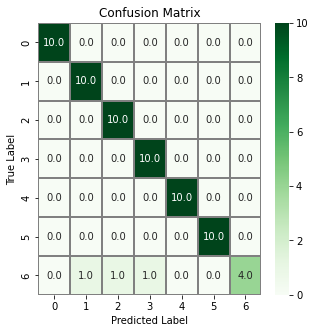

In [289]:
#Confusion matrix
import seaborn as sns
cm=confusion_matrix(y_test,y_pred_class)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=devices_label_dict)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
# disp.plot(ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
# plt.savefig('conf_m_full_img.pdf',bbox_inches = 'tight', pad_inches = 0, dpi= 100)
plt.show()

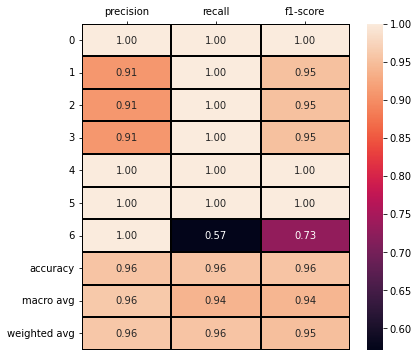

In [290]:
clf_report= classification_report(y_test, y_pred_class,output_dict=True)

 #.iloc[:-1, :] to exclude support
fig, ax = plt.subplots(figsize=(6,6))

# sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="Blues",linecolor="black", fmt= '.2f')
ax = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,linewidths=0.01,linecolor="black", fmt= '.2f')# cmap="Blues",
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
# plt.savefig('clf_full_img.pdf',bbox_inches = 'tight', pad_inches = 0, dpi= 100)


In [291]:
# import tensorflow as tf
# from tensorflow.python.client import device_lib

# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# device_lib.list_local_devices()
